<a href="https://colab.research.google.com/github/Askhilari/pythonworkbooks/blob/main/CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sympy import *
import pandas as pd
import matplotlib.pyplot as plt
import math
x, y, z, t, w = symbols('x y z t w')
init_printing(use_unicode=True)

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving kinfedgeFixed.xlsx to kinfedgeFixed.xlsx


In [ ]:
df = pd.read_excel('kinfedgeFixed.xlsx')

In [ ]:
new_df = df.iloc[:, :2].copy()
new_df.columns = ['x', 'Power']


In [ ]:
new_df2 = df.iloc[:, [3,4]].copy()
new_df2.to_csv('new_data_file.csv', index=False)

In [ ]:
dfw2 = df.iloc[:, [3,4]].copy()
dfw2.columns = ['x', 'Power2']

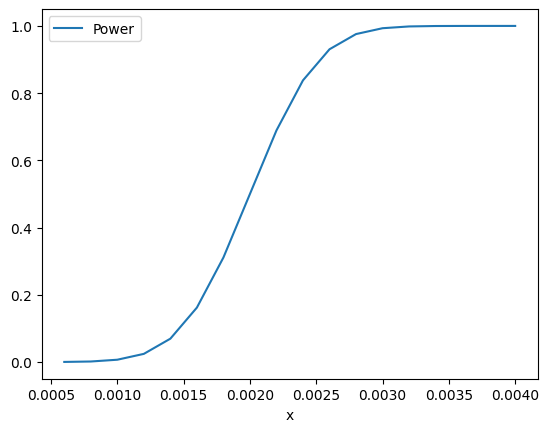

In [ ]:
new_df.iloc[3:,:].plot(x='x', y='Power')
plt.show()

In [ ]:
position_array = new_df['x'].values
power_array = new_df['Power'].values
power_array

array([4.05027e-07, 4.50555e-06, 3.96769e-05, 2.77142e-04, 1.53941e-03,
       6.82271e-03, 2.42380e-02, 6.94528e-02, 1.61923e-01, 3.10903e-01,
       5.00000e-01, 6.89097e-01, 8.38077e-01, 9.30547e-01, 9.75762e-01,
       9.93177e-01, 9.98461e-01, 9.99723e-01, 9.99960e-01, 9.99995e-01,
       1.00000e+00])

In [ ]:
position_array[:13]

array([0.    , 0.0002, 0.0004, 0.0006, 0.0008, 0.001 , 0.0012, 0.0014,
       0.0016, 0.0018, 0.002 , 0.0022, 0.0024])

In [ ]:
positionw2_array = dfw2['x'].values
powerw2_array = dfw2['Power2'].values
positionw2_array.size

21

In [ ]:
def lagrangeBasis(k, xValues):
  result = 1
  for i in range(len(xValues)):
    if i != k:
      result = result * (x - xValues[i])/(xValues[k] - xValues[i])
  return result

In [ ]:
l10 = lagrangeBasis(0, position_array[:13])
l11 = lagrangeBasis(1, position_array[:13])
l12 = lagrangeBasis(2, position_array[:13])
l13 = lagrangeBasis(3, position_array[:13])
l14 = lagrangeBasis(4, position_array[:13])
l15 = lagrangeBasis(5, position_array[:13])
l16 = lagrangeBasis(5, position_array[:13])
l17 = lagrangeBasis(5, position_array[:13])
l18 = lagrangeBasis(5, position_array[:13])
l19 = lagrangeBasis(5, position_array[:13])
l20 = lagrangeBasis(5, position_array[:13])
l21 = lagrangeBasis(5, position_array[:13])
l22 = lagrangeBasis(5, position_array[:13])


In [ ]:
pol = 4.05027*10e-7*l10+4.50555*10e-6*l11+power_array[2]*l12+power_array[3]*l13+power_array[4]*l14+power_array[5]*l15+power_array[6]*l16+power_array[7]*l17+power_array[8]*l18+power_array[9]*l19+power_array[10]*l20+power_array[11]*l21+power_array[12]*l22

In [ ]:
def get_polynomial(position_array, power_array, num_points):
  #Check if enough points are given
  if num_points > len(position_array):
    raise ValueError("Number of points requested exceeds the number of available data points.")

  basis_polynomials = [lagrangeBasis(i, position_array[:num_points]) for i in range(num_points)]
  polynomial = 0
  for i in range(num_points):
    polynomial += power_array[i] * basis_polynomials[i]
  return polynomial

In [ ]:
polynomia = get_polynomial(position_array, power_array, 21)

In [ ]:
polynomiaw2 = get_polynomial(positionw2_array, powerw2_array, 21)

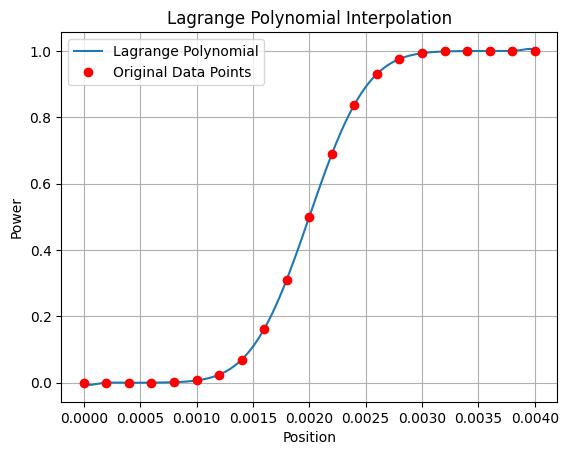

In [ ]:
x_values = np.linspace(min(position_array), max(position_array), 400)  # Generate x values for plotting
y_values = []
for x_val in x_values:
    y_values.append(polynomia.subs(x, x_val))

plt.plot(x_values, y_values, label='Lagrange Polynomial')
plt.plot(position_array[:21], power_array[:21], 'ro', label='Original Data Points')
plt.xlabel('Position')
plt.ylabel('Power')
plt.title('Lagrange Polynomial Interpolation')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
filtered_predictions = [pred for pred in predictionHalfPos if pred.is_real and 0.0017 <= pred <= 0.0023]
filtered_predictions

[0.00183903229174034, 0.0019818802796893, 0.00220338994445722]

In [ ]:
solve(polynomia-(1/(2*exp(2))),x)

[]

In [ ]:
updatedPoly = polynomia.subs(x,t) - (1/(2*exp(2)))

In [ ]:
def secant(f, p0, p1, tol):
  for n in range (1,20):
    p = p1 - f(p1)*(p1-p0)/(f(p1)-f(p0))
    if f(p) == 0 or np.abs((p-p1)/p) < tol:
      print('Value for p is :', p, 'Iteration is: ' ,n,)
      return
    p0 = p1
    p1 = p
    n=n+1
  y = f(p)
  print('Does not work, function value is', y)

In [ ]:
secant(lambda t: polynomia.subs(x,t)-1/2,0.0018, 0.0022, 0.005)

Value for p is : 0.00200000000000000 Iteration is:  2


In [ ]:
secant(lambda t: polynomia.subs(x,t)-(1-0.0676676),0.002, .003, 0.005)

Value for p is : 0.00260596488948981 Iteration is:  7


In [ ]:
w1 = 0.00260596488948981 - 0.00200000000000000
w1

0.00060596488948981

In [ ]:
secant(lambda t: polynomiaw2.subs(x,t)-1/2,0.0008, 0.0012, 0.005)

Value for p is : 0.00100000000000000 Iteration is:  2


In [ ]:
secant(lambda t: polynomiaw2.subs(x,t)-(1-0.0676676),0.0011, .0015, 0.0005)

Value for p is : 0.00123738028801892 Iteration is:  8


In [ ]:
w2 = 0.00123738028801892 - 0.00100000000000000
w2

0.00023738028801892005

In [ ]:
z1 = 0.5
z2 = 0.25
pii = math.pi

In [ ]:
(z2-z1)+(pii*((-x**4+x**2*w1**2)**(1/2)-(-x**4+x**2*w2**2)**(1/2)))/(6.32e-7)

                                                  0.5                                              ↪
                   ⎛   4                        2⎞                       ⎛   4                     ↪
- 4970874.45188258⋅⎝- x  + 5.63494011399454e-8⋅x ⎠    + 4970874.45188258⋅⎝- x  + 3.67193447294398e ↪

↪       0.5       
↪     2⎞          
↪ -7⋅x ⎠    - 0.25

In [ ]:
secant(lambda x:(z2-z1)+(pii*((-x**4+x**2*w1**2)**(1/2)-(-x**4+x**2*w2**2)**(1/2)))/(6.32e-7), 1e-4,1.8e-4,5e-5)

Value for p is : 0.00012815343091495207 Iteration is:  4


In [ ]:
w0 = 0.00012815343091495207

In [ ]:
z0 = z1-(abs(1-(w1/w0)**2)*(pii*w0**2/6.32e-7)**2)**(1/2)
z0

0.12271082622238999

Personal Case Study: Black-Scholes Model with secant

In [ ]:
S = 1667.30
K = 1670
r = 0.062
T = 21/247

In [ ]:
from scipy import stats

In [ ]:
stdNorm = stats.norm(loc = 0, scale = 1)
phi = lambda a: stdNorm.cdf(a)

In [ ]:
def c(x_val):
  d1 = (np.log(S/K)+(r+(x_val**2)/2)*T)/(x_val*np.sqrt(T))
  d2 = d1-x_val*np.sqrt(T)
  return S*phi(d1)-K*np.exp(-r*T)*phi(d2)

In [ ]:
secant(lambda v: c(v)-36.8,0.3,4,1e-4)

Value for p is : 0.1739535774479604 Iteration is:  4
